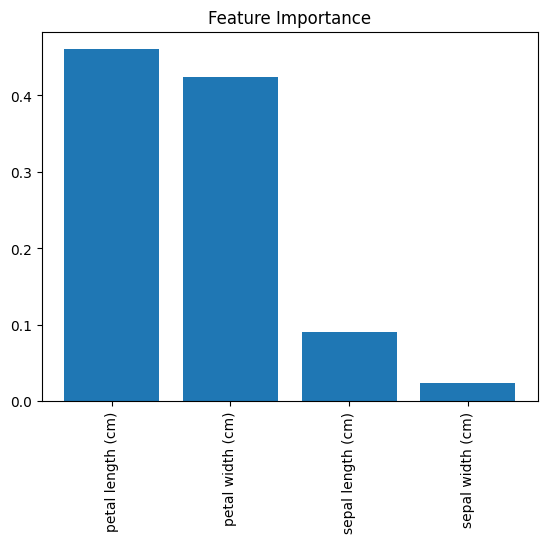

In [ ]:
#14.7 Identifying Important Features in Random Forests

# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features, target = iris.data, iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1] 

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation = 90)

# Show plot
plt.show()

In [2]:
# View feature importances
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [3]:
#14.8 Selecting Important Features in Random Forests

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# Load data
iris = datasets.load_iris()
features, target = iris.data, iris.target

# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create object that selects features with importance greater
# than or equal to a threshold
Selector  = SelectFromModel(randomforest, threshold=0.3)

# Create new feature matrix using selector
features_important = Selector.fit_transform(features, target)

# Train random forest using most important features
model = randomforest.fit(features_important, target)


In [ ]:
#14.9 Handling Imbalanced Classes

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features, target = iris.data, iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40:, :]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0),0 ,1)

# Create random forest classifier object
randomforest = RandomForestClassifier(
    random_state=0, n_jobs=-1, class_weight='balanced'
)

# Train model
model = randomforest.fit(features, target)


In [4]:
# Calculate weight for small class
110/(2*10)

5.5

In [5]:
# Calculate weight for large class
110/(2*100)

0.55

In [ ]:
#14.10 Controlling Tree Size

# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None, # حداکثر عمق درخت
                                      min_samples_split=2, # حداقل تعداد نمونه‌ها در یک گره قبل از اینکه آن گره تقسیم شود
                                      min_samples_leaf=1, # حداقل نمونه در برگ
                                      min_weight_fraction_leaf=0, # حداقل وزن نسبی در برگ
                                      max_leaf_nodes=None,  # حداکثر تعداد برگ‌ها
                                      min_impurity_decrease=0 # حداقل کاهش ناخالصی برای انجام تقسیم
                                      )

# Train model
model = decisiontree.fit(features, target)

In [ ]:
#14.11 Improving Performance Through Boosting

# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model
model = adaboost.fit(features, target)

In [ ]:
#14.12 Training an XGBoost Model

# Load libraries
import xgboost as xgb
from sklearn.metrics import classification_report
from numpy import argmax

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create dataset
xgb_train = xgb.DMatrix(features, label = target)

# Define parameters
param = {
    'objective': 'multi:softprob', # برای دسته‌بندی چندکلاسه
    'num_class': 3
}

# Train model
gbm = xgb.train(param, xgb_train)

# Get predictions
predictions = argmax(gbm.predict(xgb_train), axis=1)
# axis = 1:
# در هر ردیف بیشترین مقدار را پیدا می‌کند و اندیس ستون (کلاس) متناظر را برمی‌گرداند

# Get a classification report
print(classification_report(target, predictions))

In [11]:
# Load libraries
import lightgbm as lgb
from sklearn import datasets, preprocessing
from sklearn.metrics import classification_report
from numpy import argmax

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create dataset
lgb_train = lgb.Dataset(features, target)

# Define parameters
params = {
'objective': 'multiclass',
'num_class': 3,
'verbose': -1,
}

# Train model
gbm = lgb.train(params, lgb_train)

# Get predictions
predictions = argmax(gbm.predict(features), axis=1)

# Get a classification report
print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

